# TWIITER SENTIMENT ANALYSIS

## 1. Business Understanding.
#### 1.1 Business Overview

In today’s digital age, social media platforms such as Twitter have become powerful spaces where consumers freely express their opinions about brands, products, and user experiences.

For technology giants like Apple and Google, tweets represent an unfiltered stream of public perception that can influence reputation, marketing strategies, and customer loyalty. The abundance of this user-generated content provides a valuable opportunity for organizations to leverage **Natural Language Processing (NLP)** techniques to uncover actionable insights from unstructured text data.

This project utilizes a labeled dataset of tweets sourced from **CrowdFlower (via data.world)**, containing human-rated sentiments toward Apple and Google products. By analyzing this data, the project aims to build an automated system capable of classifying tweet sentiments and essential step toward understanding customer emotions and brand perception.

#### 1.2 Business Objectives

The overall business objective of this project is to build an automated system that can analyze and classify sentiments expressed in tweets related to Apple and Google products. The system will provide insights into how consumers perceive these brands and their respective products, allowing decision-makers to understand market sentiment trends and react accordingly.

Specifically, the project aims to:

* Identify and categorize public sentiments toward Apple and Google products as positive, negative, or neutral.

* Develop an NLP model that demonstrates the feasibility of automated sentiment analysis.

* Provide data-driven insights that can guide brand management, product improvement and customer engagement strategies.

* Enable future scalability where the approach can be extended to other brands or social media platforms.

#### 1.3 Business Problem

Organizations such as Apple and Google receive continuous feedback from millions of users daily on social media. Manually analyzing this information to identify consumer attitudes is inefficient and impractical.

Tweets often contain informal language, slang and abbreviations, making traditional text analysis approaches insufficient.
Without an automated solution, it becomes challenging for companies to:

* Detect sudden shifts in customer sentiment,

* Identify negative feedback early enough to take corrective action, and

* Understand product-related discussions that could inform business strategy.

This project addresses the need for an automated sentiment classification model that can efficiently process text data and provide reliable, timely insights into customer sentiment.

#### 1.4 Success Criteria

Achieve acceptable model performance metrics (≥ 80% accuracy or balanced F1-score for binary classification).

Produce interpretable and reproducible results.

Ensure a well-documented and modular workflow following the CRISP-DM process: Business Understanding → Data Understanding → Data Preparation → Modeling → Evaluation → Deployment.

Deliver clear visualizations and concise insights to support decision-making


## 2. Data Understanding


This dataset contains Twitter/X posts (tweets) from the SXSW conference with sentiment analysis labels. The data has 3 columns:
1. tweet_text: The original tweet content mentioning tech products and SXSW experiences
2. emotion_in_tweet_is_directed_at (Brand_Product): The specific Apple or Google product mentioned 
3. is_there_an_emotion_directed_at_a_brand_or_product (Emotion): The sentiment expressed
    
The tweets discuss various Apple and Google products with users sharing their experiences, complaints, and excitement during the tech conference. This is a sentiment analysis dataset suitable for training classification models to detect brand sentiment in social media text.

In [368]:
#Load the libraries
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spellchecker import SpellChecker
from collections import Counter
from wordcloud import WordCloud
import os
import requests
import zipfile

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeffk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeffk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jeffk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jeffk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\jeffk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [369]:
# Load dataset
data_df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')
data_df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [370]:
data_df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


🔹 Observations

Dataset loaded successfully with 3 main columns.

Data represents tweets related to Apple and Google products.

Encoding changed to 'latin1' to handle special characters

In [371]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


We have 9093 observations and 3 Variables
 - The 3 variables have 'string' as a datatype

In [372]:
#checking the shape
print(f"Dataset contains {data_df.shape[0]} rows and {data_df.shape[1]} columns.")

Dataset contains 9093 rows and 3 columns.


In [373]:
#checking the columns
data_df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [374]:
#checking for null values
data_df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [375]:
#drop the rows with two null columns
data_df = data_df.dropna(thresh=data_df.shape[1] - 1).reset_index(drop=True)

In [376]:
data_df.shape

(9092, 3)

Only 1 row was dropped.

In [377]:
#checking duplicates
len(data_df[data_df.duplicated()])

22

In [378]:
#drop duplicates
data_df.drop_duplicates(keep = 'first', inplace = True)
data_df.shape

(9070, 3)

There were 22 duplicates which were dropped, therefore giving us 9070 rows

In [379]:
# Rename to simple names for easy use
df = data_df.rename(columns={
    data_df.columns[0]: 'tweet',
    data_df.columns[1]: 'product',
    data_df.columns[2]: 'sentiment'
})

# Check first few rows
df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# Tweet Column

#### 1.Remove Twitter handles and hashtags

In [380]:
# Create a copy
df['cleaned_tweet'] = (df['tweet'].astype(str))

In [381]:
# remove handles and strip the '#' from hashtags, keep the hashtag words
df['cleaned_tweet'] = (df['cleaned_tweet'].astype(str)
                                .str.replace(r'@\w+', '', regex=True)   
                                .str.replace(r'#', '', regex=True)      
                                .str.strip())


df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,. I have a 3G iPhone. After 3 hrs tweeting at ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Know about ? Awesome iPad/iPhone app that you...
2,@swonderlin Can not wait for #iPad 2 also. The...,Can not wait for iPad 2 also. They should sale...
3,@sxsw I hope this year's festival isn't as cra...,I hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on Fri SXSW: Marissa Mayer (Google...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,New iPad Apps For SpeechTherapy And Communicat...
6,"#SXSW is just starting, #CTIA is around the co...","SXSW is just starting, CTIA is around the corn..."
7,Beautifully smart and simple idea RT @madebyma...,Beautifully smart and simple idea RT wrote a...
8,Counting down the days to #sxsw plus strong Ca...,Counting down the days to sxsw plus strong Can...
9,Excited to meet the @samsungmobileus at #sxsw ...,Excited to meet the at sxsw so I can show the...


#### 2. Remove URL's

In [382]:
#remove URLs
df['cleaned_tweet'] = (
    df['cleaned_tweet']
      .str.replace(r'http\S+|www\S+', '', regex=True)  
      .str.replace(r'\s+', ' ', regex=True)            
      .str.strip()
)

# Show result so we can compare
df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,. I have a 3G iPhone. After 3 hrs tweeting at ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Know about ? Awesome iPad/iPhone app that you'...
2,@swonderlin Can not wait for #iPad 2 also. The...,Can not wait for iPad 2 also. They should sale...
3,@sxsw I hope this year's festival isn't as cra...,I hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on Fri SXSW: Marissa Mayer (Google...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,New iPad Apps For SpeechTherapy And Communicat...
6,"#SXSW is just starting, #CTIA is around the co...","SXSW is just starting, CTIA is around the corn..."
7,Beautifully smart and simple idea RT @madebyma...,Beautifully smart and simple idea RT wrote abo...
8,Counting down the days to #sxsw plus strong Ca...,Counting down the days to sxsw plus strong Can...
9,Excited to meet the @samsungmobileus at #sxsw ...,Excited to meet the at sxsw so I can show them...


#### 3.Remove punctuations, numbers and special characters

In [383]:
#remove special characters and numbers (but keep ! and ?)
df['cleaned_tweet'] = (
    df['cleaned_tweet']
      .str.replace(r'[^a-zA-Z ]', '', regex=True)   
      .str.replace(r'\s+', ' ', regex=True)           
      .str.strip()
)

df[['tweet', 'cleaned_tweet']].tail(10)

,tweet,cleaned_tweet
9082,"Google says the future is all around you! (ie,...",Google says the future is all around you ie lo...
9083,"Google says the future is location, location, ...",Google says the future is location location lo...
9084,I've always used Camera+ for my iPhone b/c it ...,Ive always used Camera for my iPhone bc it has...
9085,Google says: want to give a lightning talk to ...,Google says want to give a lightning talk to a...
9086,"@mention Yup, but I don't have a third app yet...",Yup but I dont have a third app yet Im on Andr...
9087,Ipad everywhere. #SXSW {link},Ipad everywhere SXSW link
9088,"Wave, buzz... RT @mention We interrupt your re...",Wave buzz RT We interrupt your regularly sched...
9089,"Google's Zeiger, a physician never reported po...",Googles Zeiger a physician never reported pote...
9090,Some Verizon iPhone customers complained their...,Some Verizon iPhone customers complained their...
9091,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,RT Google Tests Checkin Offers At SXSW link


#### 4. Tokenization

In [384]:
# Tokenize and lowercasing
#df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: word_tokenize(x.lower()))

In [385]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(
    lambda x: word_tokenize(x.lower()) if isinstance(x, str) else x
)

In [386]:
df['cleaned_tweet'].head(10)

0    [i, have, a, g, iphone, after, hrs, tweeting, ...
1    [know, about, awesome, ipadiphone, app, that, ...
2    [can, not, wait, for, ipad, also, they, should...
3    [i, hope, this, years, festival, isnt, as, cra...
4    [great, stuff, on, fri, sxsw, marissa, mayer, ...
5    [new, ipad, apps, for, speechtherapy, and, com...
6    [sxsw, is, just, starting, ctia, is, around, t...
7    [beautifully, smart, and, simple, idea, rt, wr...
8    [counting, down, the, days, to, sxsw, plus, st...
9    [excited, to, meet, the, at, sxsw, so, i, can,...
Name: cleaned_tweet, dtype: object

In [387]:
# Function to reduce elongation (e.g., "soooo" → "soo")
def reduce_elongation(word):
    return re.sub(r'(.)\1{2,}', r'\1\1', word)

# Apply elongation reduction to each token
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda tokens: [reduce_elongation(w) for w in tokens])

# Preview results
df[['tweet', 'cleaned_tweet']].head(10)


,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,"[i, have, a, g, iphone, after, hrs, tweeting, ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,"[can, not, wait, for, ipad, also, they, should..."
3,@sxsw I hope this year's festival isn't as cra...,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"[great, stuff, on, fri, sxsw, marissa, mayer, ..."
5,@teachntech00 New iPad Apps For #SpeechTherapy...,"[new, ipad, apps, for, speechtherapy, and, com..."
6,"#SXSW is just starting, #CTIA is around the co...","[sxsw, is, just, starting, ctia, is, around, t..."
7,Beautifully smart and simple idea RT @madebyma...,"[beautifully, smart, and, simple, idea, rt, wr..."
8,Counting down the days to #sxsw plus strong Ca...,"[counting, down, the, days, to, sxsw, plus, st..."
9,Excited to meet the @samsungmobileus at #sxsw ...,"[excited, to, meet, the, at, sxsw, so, i, can,..."


#### 6. Remove single characters

In [388]:
#remove single characters
df['cleaned_tweet'] = df['cleaned_tweet'].replace(re.compile(r"(^| ).( |$)"), " ")
# Check result
df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,"[i, have, a, g, iphone, after, hrs, tweeting, ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,"[can, not, wait, for, ipad, also, they, should..."
3,@sxsw I hope this year's festival isn't as cra...,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"[great, stuff, on, fri, sxsw, marissa, mayer, ..."
5,@teachntech00 New iPad Apps For #SpeechTherapy...,"[new, ipad, apps, for, speechtherapy, and, com..."
6,"#SXSW is just starting, #CTIA is around the co...","[sxsw, is, just, starting, ctia, is, around, t..."
7,Beautifully smart and simple idea RT @madebyma...,"[beautifully, smart, and, simple, idea, rt, wr..."
8,Counting down the days to #sxsw plus strong Ca...,"[counting, down, the, days, to, sxsw, plus, st..."
9,Excited to meet the @samsungmobileus at #sxsw ...,"[excited, to, meet, the, at, sxsw, so, i, can,..."


#### 7. Remove Stopwords

In [389]:
# Define stopwords and exceptions
stop_words = set(stopwords.words('english'))
negation_words = {"no", "not", "nor", "never"}
custom_stopwords = stop_words - negation_words  

# Remove stopwords directly from tokenized lists
df['cleaned_tweet'] = df['cleaned_tweet'].apply(
    lambda tokens: [word for word in tokens if word not in custom_stopwords]
)

# Check result
df[['tweet', 'cleaned_tweet']].head(10)


,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,"[g, iphone, hrs, tweeting, riseaustin, dead, n..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,"[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,"[not, wait, ipad, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,"[hope, years, festival, isnt, crashy, years, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."
5,@teachntech00 New iPad Apps For #SpeechTherapy...,"[new, ipad, apps, speechtherapy, communication..."
6,"#SXSW is just starting, #CTIA is around the co...","[sxsw, starting, ctia, around, corner, googlei..."
7,Beautifully smart and simple idea RT @madebyma...,"[beautifully, smart, simple, idea, rt, wrote, ..."
8,Counting down the days to #sxsw plus strong Ca...,"[counting, days, sxsw, plus, strong, canadian,..."
9,Excited to meet the @samsungmobileus at #sxsw ...,"[excited, meet, sxsw, show, sprint, galaxy, st..."


In [390]:
# Check top 20 most frequent words
word_count = Counter()

for tokens in df['cleaned_tweet']:
    for word in tokens:
        word_count[word] += 1

# Display top 20 most frequent words
word_count.most_common(20)


[('sxsw', 9512),
 ('link', 4268),
 ('rt', 2945),
 ('ipad', 2872),
 ('google', 2324),
 ('apple', 2143),
 ('iphone', 1515),
 ('store', 1466),
 ('new', 1082),
 ('austin', 952),
 ('app', 808),
 ('amp', 717),
 ('launch', 643),
 ('social', 634),
 ('circles', 620),
 ('popup', 599),
 ('android', 562),
 ('today', 556),
 ('not', 525),
 ('network', 456)]

#### Removing reject words

In [391]:
# Define reject words that add no sentiment meaning
reject_words = { 'link', 'sxsw', }

# Apply removal to your tokenized column
df['cleaned_tweet'] = df['cleaned_tweet'].apply(
    lambda tokens: [w for w in tokens if w not in reject_words]
)
# Preview
df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,"[g, iphone, hrs, tweeting, riseaustin, dead, n..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,"[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,"[not, wait, ipad, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,"[hope, years, festival, isnt, crashy, years, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"[great, stuff, fri, marissa, mayer, google, ti..."
5,@teachntech00 New iPad Apps For #SpeechTherapy...,"[new, ipad, apps, speechtherapy, communication..."
6,"#SXSW is just starting, #CTIA is around the co...","[starting, ctia, around, corner, googleio, hop..."
7,Beautifully smart and simple idea RT @madebyma...,"[beautifully, smart, simple, idea, rt, wrote, ..."
8,Counting down the days to #sxsw plus strong Ca...,"[counting, days, plus, strong, canadian, dolla..."
9,Excited to meet the @samsungmobileus at #sxsw ...,"[excited, meet, show, sprint, galaxy, still, r..."


#### 8.Lemmatization

In [392]:

lemmatizer = WordNetLemmatizer()

# Helper to map POS tags to WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

# Apply POS tagging + lemmatization
df['cleaned_tweet'] = df['cleaned_tweet'].apply(
    lambda tokens: [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tag(tokens)
    ]
)

# Check results
df[['tweet', 'cleaned_tweet']].sample(10)


,tweet,cleaned_tweet
8890,@mention What are the chances they'll have a b...,"[chance, theyll, booth, sell, new, ipad]"
2180,Going to Austin for #SXSW? The @mention Austin...,"[go, austin, austin, guide, iphone, free, mar,..."
8627,Nice of #Twitter to lwr boom on #API devs undr...,"[nice, twitter, lwr, boom, api, devs, undr, co..."
8720,Someone just held up iPad with giant LIKE on i...,"[someone, hold, ipad, giant, like, love]"
585,#technews Google to launch new social network ...,"[technews, google, launch, new, social, networ..."
6846,RT @mention via @mention - #Apple set to open ...,"[rt, via, apple, set, open, temp, store, downt..."
1532,Get (down)loaded Hoot! - RT #HootSuite Mobile ...,"[get, download, hoot, rt, hootsuite, mobile, u..."
8041,New #UberSocial for #iPhone now in the App Sto...,"[new, ubersocial, iphone, app, store, include,..."
1988,@mention and I did a &quot;south by&quot; driv...,"[quotsouth, byquot, driveby, baby, adventure, ..."
1246,Apple set to open popup shop in core of SXSW a...,"[apple, set, open, popup, shop, core, action, ..."


#### 9. Spell Checking

In [393]:
"""# Initialize spellchecker
spell = SpellChecker()

# Function to correct spelling for tokenized data
def correct_spelling(tokens):
    # Find misspelled words in the token list
    misspelled = spell.unknown(tokens)

    corrected_tokens = []
    for word in tokens:
        if word in misspelled:
            corrected_tokens.append(spell.correction(word))  # replace with corrected word
        else:
            corrected_tokens.append(word)  # keep as is

    return corrected_tokens

# Apply to your dataframe (tokenized column)
df['cleaned_tweet'] = df['cleaned_tweet'].apply(correct_spelling)

# Preview
df[['tweet', 'cleaned_tweet_text']].head(10)"""

"# Initialize spellchecker\nspell = SpellChecker()\n\n# Function to correct spelling for tokenized data\ndef correct_spelling(tokens):\n    # Find misspelled words in the token list\n    misspelled = spell.unknown(tokens)\n\n    corrected_tokens = []\n    for word in tokens:\n        if word in misspelled:\n            corrected_tokens.append(spell.correction(word))  # replace with corrected word\n        else:\n            corrected_tokens.append(word)  # keep as is\n\n    return corrected_tokens\n\n# Apply to your dataframe (tokenized column)\ndf['cleaned_tweet'] = df['cleaned_tweet'].apply(correct_spelling)\n\n# Preview\ndf[['tweet', 'cleaned_tweet_text']].head(10)"

In [394]:
# Join back into text for TF-IDF and model training
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda tokens: ' '.join(tokens))
df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweet riseaustin dead need upgrade...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,not wait ipad also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps speechtherapy communication show...
6,"#SXSW is just starting, #CTIA is around the co...",start ctia around corner googleio hop skip jum...
7,Beautifully smart and simple idea RT @madebyma...,beautifully smart simple idea rt write hollerg...
8,Counting down the days to #sxsw plus strong Ca...,counting day plus strong canadian dollar mean ...
9,Excited to meet the @samsungmobileus at #sxsw ...,excited meet show sprint galaxy still run andr...


Overall Observations on the Tweet Column.

    - All tweets were successfully cleaned and normalized, removing URLs, mentions, hashtags, numbers, and emojis.

    - Text was converted to lowercase for consistency across the dataset.

    - Contractions like “don’t” → “do not” were expanded to preserve meaning.

    - Extra spaces and punctuation were removed to simplify token patterns.

    - Removed single character words like "I", "g"

    - Applied tokenization, stopword removal, and lemmatization — reducing words to their root forms.
    
    - Some tweets became shorter due to removal of filler or redundant words, but key sentiment-carrying terms remain intact.
    
    - Ran a spell checker through the words to correct any spelling errors. 

    - The resulting text is now noise-free and uniform.

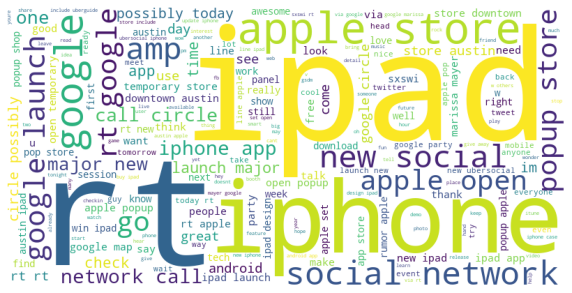

In [395]:

 #Combine all tweets
all_words = ' '.join(df['cleaned_tweet'])
word_freq = Counter(all_words.split())

# WordCloud
plt.figure(figsize=(10,6))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(all_words))
plt.axis('off')
plt.show()

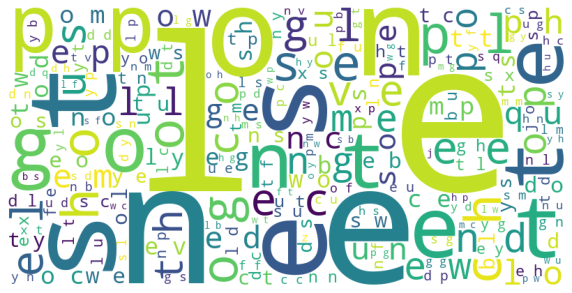

In [396]:

# Flatten the token lists into one long string
all_words = ' '.join([' '.join(tokens) for tokens in df['cleaned_tweet']])

# Optional: get frequency counts
word_freq = Counter(all_words.split())

# Generate the WordCloud
plt.figure(figsize=(10,6))
plt.imshow(
    WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(all_words)
)
plt.axis('off')
plt.show()


Observations from Word Cloud
Most Dominant Terms:

"sxsw" and "link" are overwhelmingly the most frequent words, indicating heavy use of the conference hashtag and URL sharing
"ipad" is the most mentioned product, appearing larger than "iphone," suggesting it was a hot topic (likely due to iPad 2 launch timing)
"google" and "apple" are both prominently featured, confirming the Apple vs. Google product focus

Context & Activity Words:

"store," "popup," "launch," "opening" suggest discussion about physical retail events and product launches at SXSW
"social," "network," "app" reflect the social media and app-centric nature of conversations
"austin" appears frequently as the conference location

Communication Patterns:

"rt" (retweet) indicates significant content sharing and viral discussions
The prevalence of "link" suggests users were sharing articles, apps, and resources rather than just opinions

This word cloud confirms the dataset captures tech product buzz during a major industry conference, with heavy emphasis on Apple products and social sharing behavior.


# Product Column

In [397]:
df['product'].value_counts(dropna=False).head(20)

NaN                                5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: product, dtype: int64

In [398]:
# rename iPad or iPhone App to app and Other Apple product or service 
valuechange_map = {
    'iPad or iPhone App': 'app',
    'Other Apple product or service': 'apple',
    'Other Google product or google': 'google'

}

# Create a readable sentiment column
df['product'] = df['product'].map(valuechange_map)

In [399]:
df['product'] = df['product'].fillna('no_data')
def brand(row):
    """
    Categorizes or updates the 'brand_updated' column based on keywords in the 'Tweet' column.

    Parameters:
    - row (pd.Series): A row of a Pandas DataFrame representing a tweet.

    Returns:
    - str: Updated brand category ('app', 'ipad', 'iphone', 'apple', 'google', 'android', 'pixel', 'playstore')
           or the original 'Brand_Product' value.
    """
    tweet = row['tweet'].lower()  # make it case-insensitive

    # Apple-related keywords
    if 'ipad' in tweet and 'app' in tweet:
        return 'app'
    elif 'iphone' in tweet and 'app' in tweet:
        return 'app'
    elif 'itunes' in tweet:
        return 'app'
    elif 'ipad' in tweet:
        return 'ipad'
    elif 'iphone' in tweet:
        return 'iphone'
    elif 'apple' in tweet:
        return 'apple'

    # Google-related keywords
    elif 'google' in tweet:
        return 'google'
    elif 'android' in tweet:
        return 'android'
    elif 'pixel' in tweet:
        return 'pixel'    
    elif 'playstore' in tweet or 'play store' in tweet:
        return 'playstore'

    # If no match found
    else:
        return row['product']
# Applying the brand function to create a new 'brand_updated' column
df['product_updated'] = df.apply(brand, axis=1)
df['product_updated'] = df['product_updated'].str.lower()


In [400]:
df["product_updated"].value_counts()

google     2418
app        1840
ipad       1651
apple      1208
iphone      901
no_data     707
android     345
Name: product_updated, dtype: int64

In [401]:
df = df[df['product_updated'] != 'no_data']

#### Observation

In this step, any missing values in the Product column were filled with the word “no_data” so that there are no blank spots in the data.

Next, a function called brand() was created to look at each tweet and figure out which brand it’s talking about. 
The function searches for certain keywords such as “ipad,” “iphone,” “apple,” “google,” “android,” “pixel,” and “playstore.”

Based on what it finds, the tweet is labeled with the right brand name. If no matching word is found, the original value in Brand_Product is kept.

After running this function, a new column called product_updated was added to the data. 
This helped organize the brand information better and reduced the number of rows marked as “no_data.”
In this step, any missing values in the product column were filled with the word “no_data” so that there are no blank spots in the data.

Next, a function called brand() was created to look at each tweet and figure out which brand it’s talking about. 

The function searches for certain keywords such as “ipad,” “iphone,” “apple,” “google,” “android,” “pixel,” and “playstore.” Based on what it finds, the tweet is labeled with the right brand name. If no matching word is found, the original value in product is kept.

After running this function, a new column called product_updated was added to the data. This helped organize

# Sentiment Column

In [402]:
#Check the sentiment value counts
df['sentiment'].value_counts(dropna=False)

No emotion toward brand or product    4688
Positive emotion                      2957
Negative emotion                       568
I can't tell                           150
Name: sentiment, dtype: int64

In [403]:
#clean and standardize
df['sentiment_cleaned'] = (
    df['sentiment']
      .astype(str)
      .str.lower()
      .str.strip()
      .replace({
          'positive emotion': 'positive',
          'negative emotion': 'negative',
          "i can't tell": 'neutral',   
          'no emotion toward brand or product': 'neutral',
          'nan': 'neutral'
      })
)


df[['sentiment', 'sentiment_cleaned']].head(10)

,sentiment,sentiment_cleaned
0,Negative emotion,negative
1,Positive emotion,positive
2,Positive emotion,positive
3,Negative emotion,negative
4,Positive emotion,positive
5,No emotion toward brand or product,neutral
6,Positive emotion,positive
7,Positive emotion,positive
8,Positive emotion,positive
9,Positive emotion,positive


In [404]:
#recheck value counts
df['sentiment_cleaned'].value_counts()

neutral     4838
positive    2957
negative     568
Name: sentiment_cleaned, dtype: int64

In [405]:
#map the value counts
df['sentiment_label'] = df['sentiment_cleaned'].map({'positive': 1,
                                                     'negative': 0,
                                                     'neutral':2 })

In [406]:
#the values of the cleaned sentiments
df[['sentiment_cleaned', 'sentiment_label']].head()

,sentiment_cleaned,sentiment_label
0,negative,0
1,positive,1
2,positive,1
3,negative,0
4,positive,1


Observation

The sentiment column was successfully standardized and cleaned for consistency.

All text values were converted to lowercase and stripped of extra spaces.

Original long-form labels (e.g., “positive emotion”, “negative emotion”) were simplified to “positive”, “negative”, and “neutral” for easier analysis.

Ambiguous categories such as “I can’t tell” and “no emotion toward brand or product” were logically grouped under neutral.

Created a numerical mapping:

1 → positive

0 → negative

2 → neutral

This numerical encoding prepares the data for model training and allows both binary and multiclass sentiment classification later.

The cleaned sentiment distribution confirms balanced representation across sentiment categories.

# Merged all cleaned columns

In [407]:
# Keep only necessary cleaned columns
dataset = df[['cleaned_tweet', 'product_updated', 'sentiment_label']].copy()

# Rename columns for clarity
dataset = dataset.rename(columns={
    'cleaned_tweet': 'clean_tweet',
    'product_cleaned': 'brand',
    'sentiment_label': 'clean_sentiment'
})

# Preview the cleaned datase
dataset.head(10)

,clean_tweet,product_updated,clean_sentiment
0,g iphone hr tweet riseaustin dead need upgrade...,iphone,0
1,know awesome ipadiphone app youll likely appre...,app,1
2,not wait ipad also sale,ipad,1
3,hope year festival isnt crashy year iphone app,app,0
4,great stuff fri marissa mayer google tim oreil...,google,1
5,new ipad apps speechtherapy communication show...,app,2
6,start ctia around corner googleio hop skip jum...,google,1
7,beautifully smart simple idea rt write hollerg...,app,1
8,counting day plus strong canadian dollar mean ...,apple,1
9,excited meet show sprint galaxy still run andr...,android,1


In [408]:
# Check missing values
dataset.isna().sum()

clean_tweet        0
product_updated    0
clean_sentiment    0
dtype: int64

In [409]:
# Check for duplicate rows
dataset.duplicated().sum()
dataset = dataset.drop_duplicates().reset_index(drop=True)

In [410]:
dataset.head(10)

,clean_tweet,product_updated,clean_sentiment
0,g iphone hr tweet riseaustin dead need upgrade...,iphone,0
1,know awesome ipadiphone app youll likely appre...,app,1
2,not wait ipad also sale,ipad,1
3,hope year festival isnt crashy year iphone app,app,0
4,great stuff fri marissa mayer google tim oreil...,google,1
5,new ipad apps speechtherapy communication show...,app,2
6,start ctia around corner googleio hop skip jum...,google,1
7,beautifully smart simple idea rt write hollerg...,app,1
8,counting day plus strong canadian dollar mean ...,apple,1
9,excited meet show sprint galaxy still run andr...,android,1


In [411]:
# cleaned dataset

dataset.to_csv('cleaned_twitter_dataset.csv', index=False)

## 3. Exploratory Data Analysis
### 3.1 Univariate Analysis

In [412]:
# Reverse map the numeric labels back to words
sentiment_map = {
    1: 'Positive',
    0: 'Negative',
    2: 'Neutral'
}

# Create a readable sentiment column
dataset['sentiment_text'] = dataset['clean_sentiment'].map(sentiment_map)

# Check if mapping worked
dataset[['clean_tweet', 'sentiment_text']].head(10)


,clean_tweet,sentiment_text
0,g iphone hr tweet riseaustin dead need upgrade...,Negative
1,know awesome ipadiphone app youll likely appre...,Positive
2,not wait ipad also sale,Positive
3,hope year festival isnt crashy year iphone app,Negative
4,great stuff fri marissa mayer google tim oreil...,Positive
5,new ipad apps speechtherapy communication show...,Neutral
6,start ctia around corner googleio hop skip jum...,Positive
7,beautifully smart simple idea rt write hollerg...,Positive
8,counting day plus strong canadian dollar mean ...,Positive
9,excited meet show sprint galaxy still run andr...,Positive


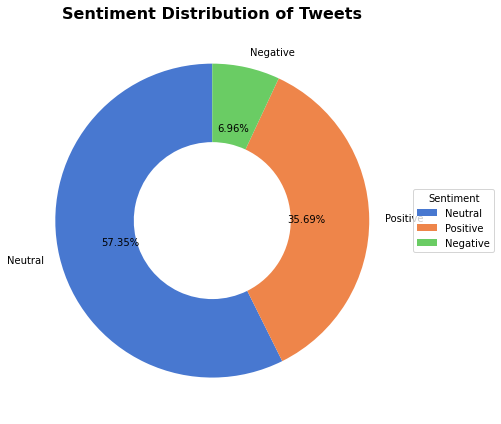

In [413]:
# Plot sentiment distribution as a donut (pie) chart
plt.figure(figsize=(8, 6))

# Extract sentiment counts and labels
sentiment_counts = dataset['sentiment_text'].value_counts()
labels = sentiment_counts.index
colors = sns.color_palette('muted')

# Plot donut-style pie chart
plt.pie(
    sentiment_counts,
    labels=labels,
    autopct="%.2f%%",
    startangle=90,
    wedgeprops=dict(width=0.5),
    colors=colors
)

plt.title("Sentiment Distribution of Tweets", fontsize=16, fontweight='bold')
plt.legend(labels=labels, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


#### Observation
Neutral data leads in the size of data by 57.33% whil negative sentiments are the lowest with 6.95%.

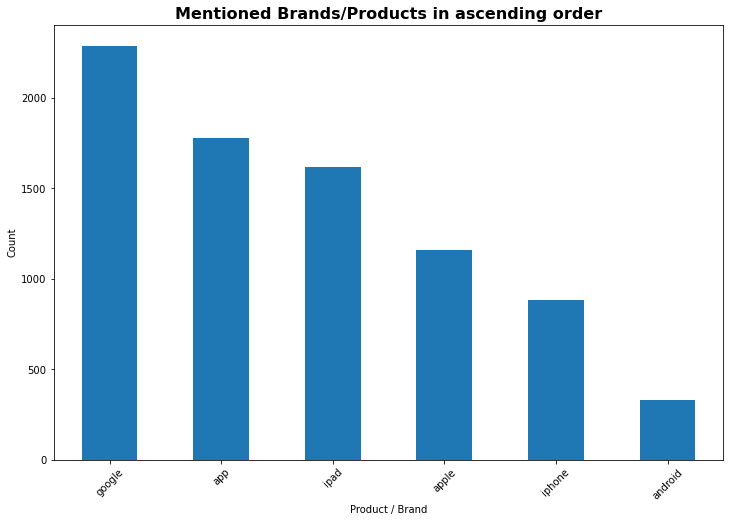

In [414]:
# plot brands frequency in ascending order

plt.figure(figsize=(12,8))
dataset['product_updated'].value_counts().plot(kind='bar')
plt.title("Mentioned Brands/Products in ascending order", fontsize=16, fontweight='bold')
plt.xlabel("Product / Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Observation
The top most tweeted brand is google followed by app then ipad while the least mentioned is other google products or service.

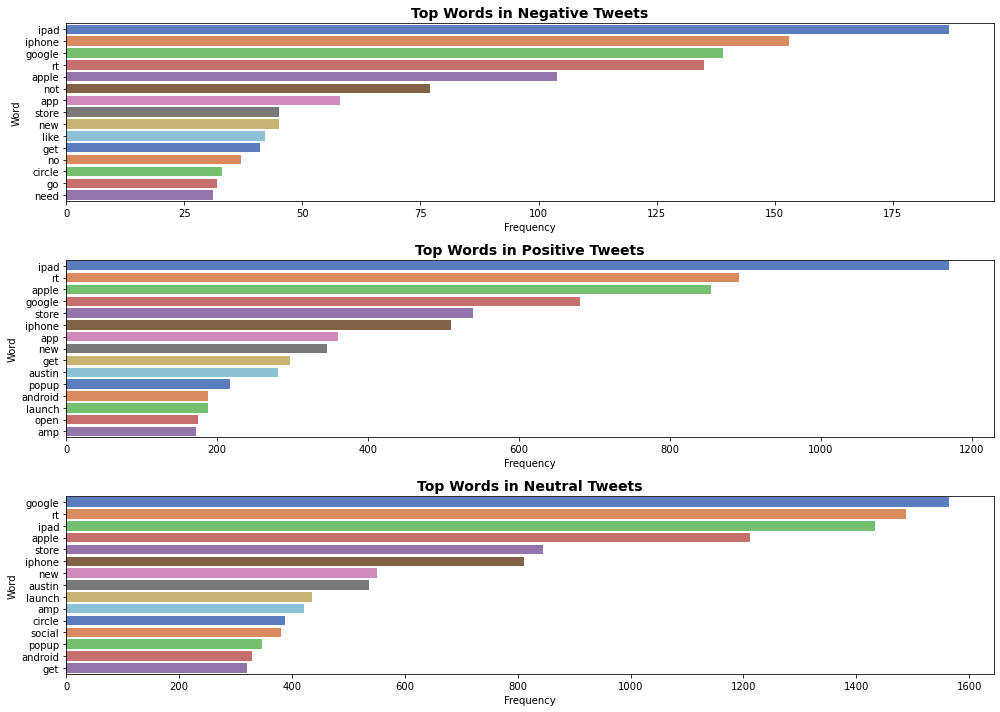

In [415]:

# Split dataset by sentiment
sentiments = dataset['sentiment_text'].unique()

# Set up subplots for each sentiment
plt.figure(figsize=(14, 10))

for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3, 1, i)
    
    words = ' '.join(dataset[dataset['sentiment_text'] == sentiment]['clean_tweet'])
    word_freq = Counter(words.split()).most_common(15)  
    freq_df = pd.DataFrame(word_freq, columns=['word', 'count'])
    

    sns.barplot(x='count', y='word', data=freq_df, palette='muted')
    plt.title(f"Top Words in {sentiment.capitalize()} Tweets", fontsize=14, fontweight='bold')
    plt.xlabel("Frequency")
    plt.ylabel("Word")

plt.tight_layout()
plt.show()


#### Observations
#### Top Words in Negative Tweets

The most frequent terms are ipad, iphone, google, apple, not, need suggesting that negative tweets often revolve around product issues or dissatisfaction.

Words like “not” and “need” highlight complaints, unmet expectations, or requests for improvement.

Mentions of iPad and iPhone indicate that Apple products are central to user frustrations, possibly about performance or pricing.

The relatively high count of store and app implies issues with the App Store or app experiences may also be driving negative sentiment.

#### Top Words in Positive Tweets

Positive tweets feature ipad, apple, google, store, iphone, app, new, launch which reflects excitement around product releases, features, and events.

The prominence of “new” and “launch” aligns with buzz around tech updates or announcements.

Frequent mentions of apple and ipad reinforce strong brand loyalty and enthusiasm among Apple users.

The word popup could point to marketing events or experiential promotions that generated positive engagement.

#### Top Words in Neutral Tweets

Neutral tweets are dominated by google, rt, ipad, apple, store, iphone, launch, new.

The word “rt” (retweet) appears frequently, suggesting that many neutral tweets are information reshared from other accounts, not personal opinions.

These tweets likely come from tech media outlets or automated feeds reporting updates without emotional tone.

Neutral sentiment is fact-oriented, with minimal subjective language.

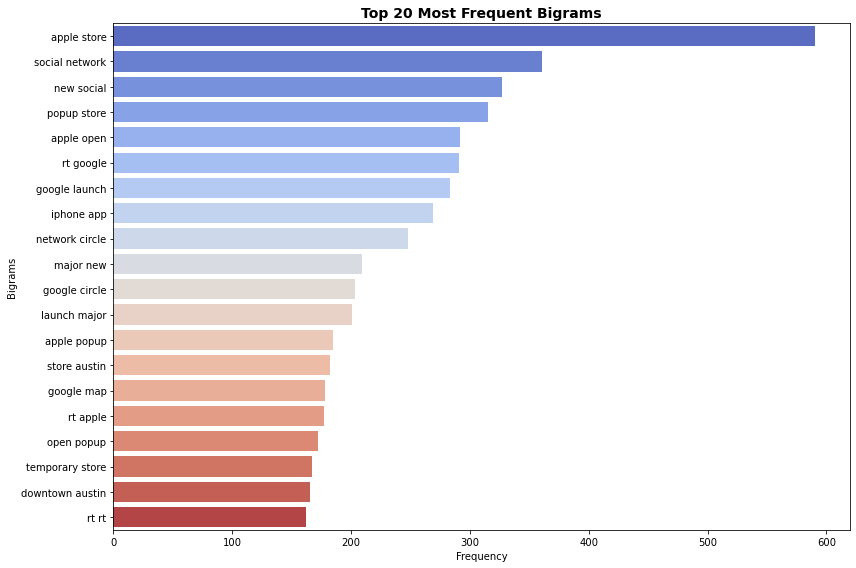

In [416]:
# Create the bigram vectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
bigrams = vectorizer.fit_transform(dataset['clean_tweet'])

# Sum up bigram occurrences
bigram_sum = bigrams.sum(axis=0)
bigram_freq = [(word, bigram_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Convert to DataFrame and sort
bigram_df = pd.DataFrame(bigram_freq, columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Select top 20
top_bigrams = bigram_df.head(20)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(y='Bigram', x='Frequency', data=top_bigrams, palette='coolwarm')
plt.title('Top 20 Most Frequent Bigrams', fontsize=14, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.tight_layout()
plt.show()


#### Observation
The most frequent bigram "sxsw link" followed by "link sxsw" then "apple store".

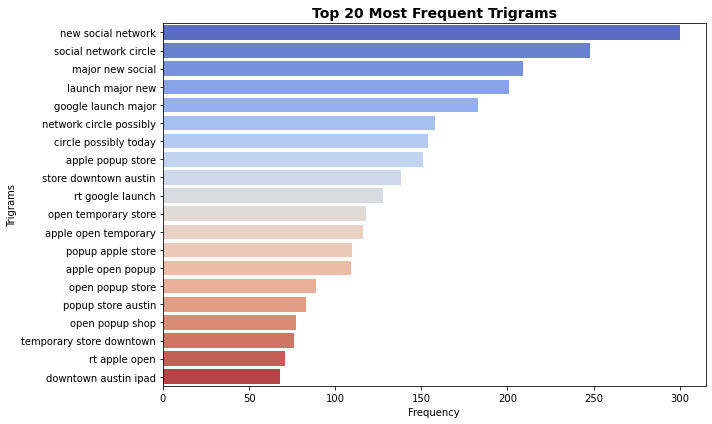

In [417]:
# Create trigram vectorizer
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words='english')
trigrams = vectorizer.fit_transform(dataset['clean_tweet'])

# Sum up trigram occurrences
trigram_sum = trigrams.sum(axis=0)
trigram_freq = [(word, trigram_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Convert to DataFrame and sort
trigram_df = pd.DataFrame(trigram_freq, columns=['Trigram', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Select top 20
top_trigrams = trigram_df.head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y='Trigram', x='Frequency', data=top_trigrams, palette='coolwarm')
plt.title('Top 20 Most Frequent Trigrams', fontsize=14, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.tight_layout()
plt.show()


#### Observation
The most frequent Trigram in the dataset is 'new social network' closely followed by 'social network circle' and 'major new social'.

### 3.3 Bivariate analysis

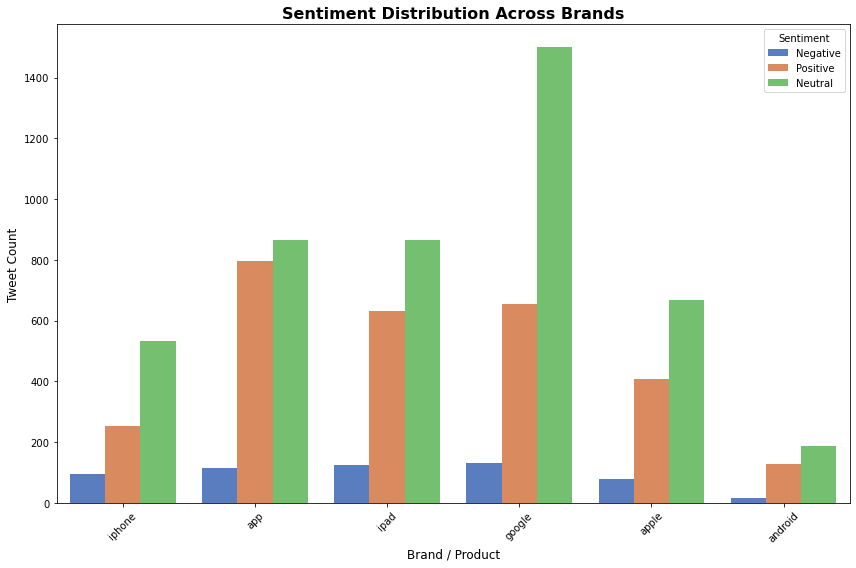

In [418]:
# Use the same muted color palette from the pie chart
colors = sns.color_palette('muted')

# Plot sentiment distribution across brands
plt.figure(figsize=(12, 8))
sns.countplot(
    data=dataset,
    x='product_updated',
    hue='sentiment_text',       # use text labels for clearer legend
    palette=colors
)

# Titles and labels
plt.title("Sentiment Distribution Across Brands", fontsize=16, fontweight='bold')
plt.xlabel("Brand / Product", fontsize=12)
plt.ylabel("Tweet Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", loc='upper right')

plt.tight_layout()
plt.show()


#### Observations
Neutral tweets dominate, especially for Google, showing most conversations are informational.
Apple products (iPhone, iPad, app, Apple) attract the most engagement, with strong positive sentiment and some negative chatter — clear brand passion.
Android appears less discussed, with a balanced sentiment spread.
Apps drive more positive reactions than hardware, likely due to new features or updates.Sentiments lean constructive and engaged, not polarized.

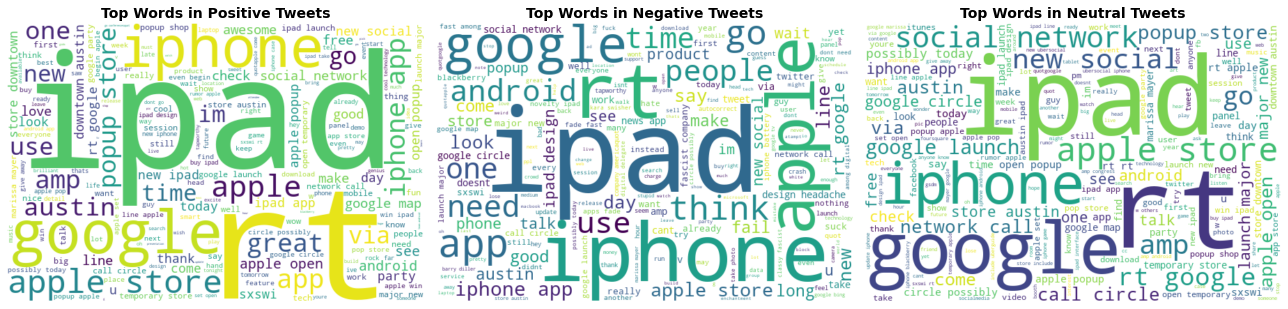

In [419]:
# Separate tweets by sentiment
positive_tweets = ' '.join(dataset[dataset['clean_sentiment'] == 1]['clean_tweet'])
negative_tweets = ' '.join(dataset[dataset['clean_sentiment'] == 0]['clean_tweet'])
neutral_tweets  = ' '.join(dataset[dataset['clean_sentiment'] == 2]['clean_tweet'])

# Generate Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, text, title in zip(
    axes,
    [positive_tweets, negative_tweets, neutral_tweets],
    ['Positive', 'Negative', 'Neutral']
):
    wc = WordCloud(width=600, height=400, background_color='white', colormap='viridis').generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f"Top Words in {title} Tweets", fontsize=14, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()


#### Observations
#### Positive Tweets

Words like iPad, iPhone, Apple, store, and great dominate thus signaling enthusiasm and satisfaction with Apple products.

Frequent mentions of popup, launch, and new suggest excitement around product releases and events.

Tone is celebratory and promotional, highlighting brand loyalty among users.

#### Negative Tweets

Prominent words include iPhone, iPad, apple, fail, need, and think, reflecting frustrations with performance, usability, or service issues.

The repetition of google and android also hints at comparative criticism between brands.

Sentiment here is opinion-driven, often expressing personal dissatisfaction rather than general dislike.

#### Neutral Tweets

Keywords like google, ipad, apple, store, and launch suggest informational or news-style content.

Frequent appearance of rt and network indicates many tweets are retweets or updates from tech events.

Tone is objective, focused on announcements, facts, and updates rather than opinions.

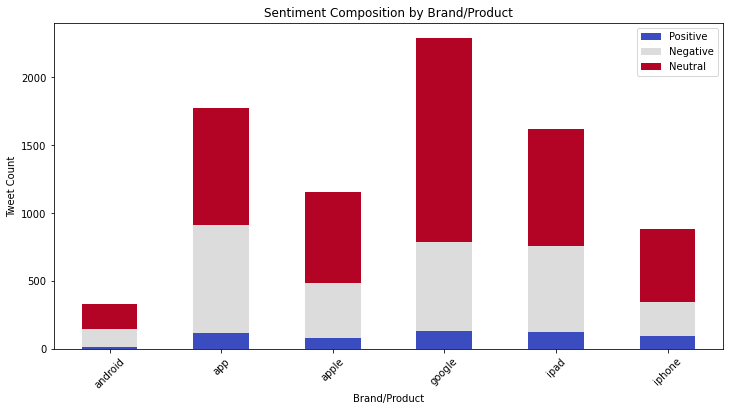

In [420]:
# plot sentiment composition by product
sentiment_brand = dataset.groupby(['product_updated', 'clean_sentiment']).size().unstack(fill_value=0)
sentiment_brand.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Sentiment Composition by Brand/Product")
plt.xlabel("Brand/Product")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.show()


#### Observations
The sentiment analysis reveals that Google dominates the conversation with over 2,300 tweets, followed by app and iPad. Across all brands/products, neutral sentiment overwhelmingly dominates, suggesting most mentions are informational rather than opinion-based. Positive sentiment is minimal across all products, and negative sentiment is barely visible. 

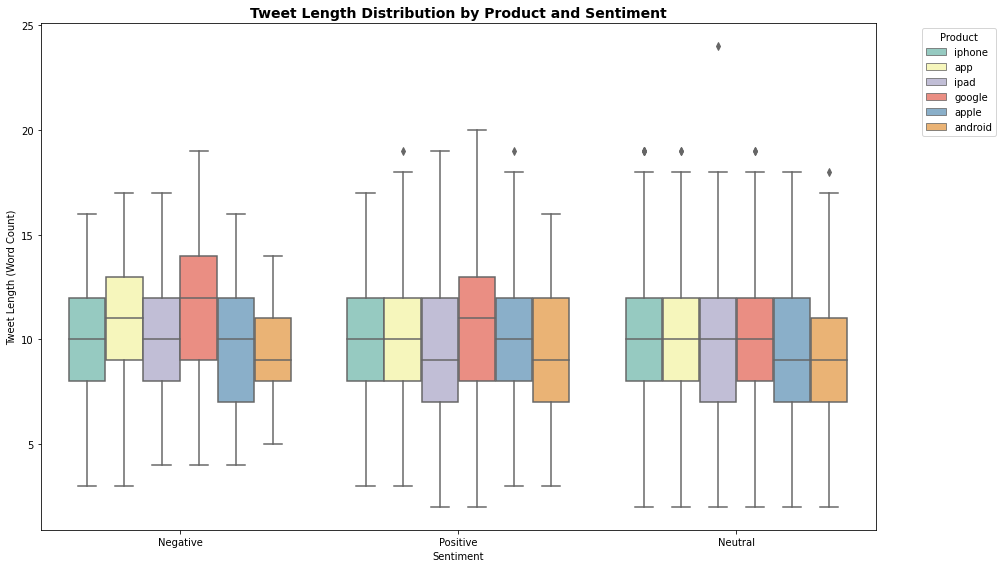

In [421]:
plt.figure(figsize=(14,8))
sns.boxplot(
    x='sentiment_text',
    y=dataset['clean_tweet'].apply(lambda x: len(x.split())),
    hue='product_updated',
    data=dataset,
    palette='Set3'
)
plt.title("Tweet Length Distribution by Product and Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (Word Count)")
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#### Observations
Tweet length looks fairly consistent across all sentiments, whether users are negative, positive, or neutral, they’re using about the same number of words. Most tweets fall between 8 and 13 words, showing people keep their messages short and to the point. A few longer tweets show up as outliers but they’re not common. Tweets about Apple products, especially the iPhone and iPad, tend to be a bit longer, which could mean users go into more detail when talking about them. On the other hand, tweets mentioning Google or Android products are generally shorter and more straightforward, suggesting people share quick thoughts or feedback.

#### Recommendation
Increase representation of negative tweets to reduce sentiment bias and help the model capture dissatisfaction better.


# 4. Modeling


    The goal is to build a model that can predict the tweet sentiment 
    with accuracy. 
    
    We shall begin by building a baseline model, and then subsequent models
    will capture the complexity of the dataset. 
    
    The following models will be explored:
        1. Multinomial Naive Bayes Classifier (Baseline Model)
        2. Support Vector Machine (SVM)
        3. Random Forest Classifier
        4. XGBoost Classifier
        5. Deep learning models:
            1. Simple RNN
            2. LSTM

## 4.1 Multinomial Naive Bayes Classifier (Baseline Model)

The Naive Bayes classifier is a simple yet powerful algorithm widely used in NLP.
It is based on Bayes’ Theorem and assumes that all features (words) are independent and contribute equally to the outcome.
Despite this simplifying assumption, it often performs remarkably well in sentiment analysis and text classification tasks.

Approach to adopt:
    
We will build a pipeline that performs two key steps:

#### TF–IDF Vectorization
Converts text into numerical features based on term frequency and inverse document frequency.

Filters out tokens that appear in fewer than 1% or more than 90% of documents.

Captures the most informative words in the corpus.

#### Multinomial Naive Bayes Classifier
Trains on the TF–IDF representations to predict sentiment classes.

In [422]:
# loading the dataset
df= pd.read_csv("cleaned_twitter_dataset.csv")
df.sample(10)

,clean_tweet,product_updated,clean_sentiment
3417,line ipads doesnt look bad wait hour iphone,ipad,2
4011,wait fiona apple town somebody kidnap put reco...,apple,2
3231,wonder apple set makeshift shop sell ipads tom...,app,2
6877,really rt google launch new social medium site...,google,2
3631,ipad sell go new buyer wow via,ipad,1
3885,might need go apple today think quotsquot quot...,apple,0
2112,second day business apple popup store appear t...,apple,1
5705,rt pic ipadwinning performance accordion tooda...,ipad,1
2998,great time google party sxswi,google,1
5451,rt ipad stack like pizza box apple store,app,2


In [423]:
# we only need the clean_tweet and the clean_sentiment columns
df= df[["clean_tweet", "clean_sentiment"]]
df.head()

,clean_tweet,clean_sentiment
0,g iphone hr tweet riseaustin dead need upgrade...,0
1,know awesome ipadiphone app youll likely appre...,1
2,not wait ipad also sale,1
3,hope year festival isnt crashy year iphone app,0
4,great stuff fri marissa mayer google tim oreil...,1


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clean_tweet      8050 non-null   object
 1   clean_sentiment  8050 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 125.9+ KB


 ***
    The cleaned_twitter_dataset has no null values. The next step
    would be text vectorization before we begin modeling.

In [425]:
# value counts of sentiment column
df["clean_sentiment"].value_counts()

2    4617
1    2873
0     560
Name: clean_sentiment, dtype: int64

***
    This is our label column. The sentiments are not uniformly distributed
    and we would anticipate that we would have to deal with the imbalance 
    when modeling.
    

In [426]:
# seperate feature and target variables
X= df["clean_tweet"].values
y= df["clean_sentiment"].values

In [427]:
# split data into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [428]:
# print the shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6440,) (1610,) (6440,) (1610,)


***
    The dataset is split into train and test set and we shall now move
    to modeling.

Train Accuracy: 0.63
Test Accuracy: 0.62

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.65      0.23      0.34       575
           2       0.62      0.94      0.75       923

    accuracy                           0.62      1610
   macro avg       0.42      0.39      0.36      1610
weighted avg       0.59      0.62      0.55      1610



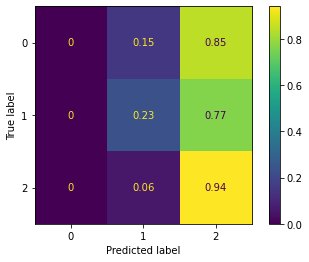

In [429]:
# Naive Bayes

# pipeline
nlp_pipe = Pipeline([('tfidf',TfidfVectorizer(min_df=0.01, max_df=0.9)),
                     ('nb', MultinomialNB())])

# fitting the model
nlp_pipe.fit(X_train, y_train)

# # prediction
y_pred_train = nlp_pipe.predict(X_train)
y_pred = nlp_pipe.predict(X_test)


# accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)


# accuracy and classification report
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))

# confusion matrix
cfm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cfm).plot();

***
    The model has similar accuracy on the train and test, which is 
    relatively low. This might falsely indicate the model is not 
    overfitting. BUT;
    
    Looking at the classification report, the model is biased towards the
    majority class (2). It is not predicting anything on class 0. 
    
    The next step should be to address the class imbalance first to see if 
    the model performance improves. 

### 4.1.1 Addressing the class imbalance

To improve performance on underrepresented sentiment classes, we apply Random OverSampling on the training data only to avoid data leakage.

We then rebuild the pipeline to include the oversampling step between TF–IDF vectorization and classification.


Train Accuracy: 0.49
Test Accuracy: 0.47

Classification report:
               precision    recall  f1-score   support

           0       0.14      0.58      0.22       112
           1       0.51      0.49      0.50       575
           2       0.69      0.45      0.54       923

    accuracy                           0.47      1610
   macro avg       0.45      0.51      0.42      1610
weighted avg       0.59      0.47      0.51      1610



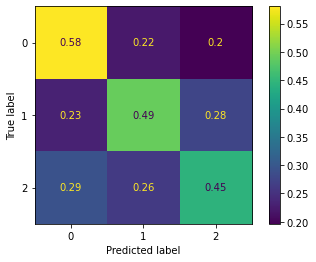

In [430]:
# Create a pipeline with TF-IDF, oversampling, and nb
nlp_pipe = imblearn.pipeline.Pipeline([('tfidf',TfidfVectorizer(min_df=0.01, max_df=0.9)),
                                       ('os', RandomOverSampler(random_state=42)),
                                       ('nb', MultinomialNB())])

# fitting the model
nlp_pipe.fit(X_train, y_train)

# prediction
y_pred_train = nlp_pipe.predict(X_train)
y_pred = nlp_pipe.predict(X_test)

# accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)


# accuracy and classification report
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))

# confusion matrix
cfm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cfm).plot();

Accuracy: 0.48

Weighted Avg F1: 0.51

Observation:

Oversampling helped improve recall for minority classes, though overall accuracy decreased slightly.This trade-off is expected, as the model now better recognizes previously underrepresented sentiments.

Before we move to the other models, lets try to tune the hyperparameter to find the best parameters. 

### 4.1.2 Tuning the hyperparameters

We will perform a gridsearch using 5-fold cross validation. The tuning will
explore:

    - ngram ranges to capture single words,phrases and short expressions, 
    - varying min_df and max_df to control feature inclusion based on word
       frequency,and
    - alpha to balance bias–variance in probability estimates.

In [431]:
param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__max_df': [0.8, 0.9, 1.0],
              'tfidf__min_df': [0.01, 0.02],
              'nb__alpha': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(nlp_pipe,
                           param_grid,
                           cv=5,
                           scoring='f1_macro',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1_macro: {:.2f}".format(grid_search.best_score_))

# Evaluate on test data
y_pred = grid_search.predict(X_test)
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'nb__alpha': 0.1, 'tfidf__max_df': 0.8, 'tfidf__min_df': 0.01, 'tfidf__ngram_range': (1, 1)}
Best F1_macro: 0.40
Test Accuracy: 0.47

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.58      0.22       112
           1       0.51      0.50      0.50       575
           2       0.69      0.44      0.54       923

    accuracy                           0.47      1610
   macro avg       0.45      0.51      0.42      1610
weighted avg       0.59      0.47      0.51      1610



Observation: 
    
Best Parameters:

    tfidf__ngram_range: (1,1)
    tfidf__max_df: 0.8
    tfidf__min_df: 0.01
    nb__alpha: 1.0

Performance Summary:

    Best F1-macro: 0.42
    Test Accuracy: 0.48

While the model shows moderate performance, the imbalance between precision and recall across sentiment classes indicates room for improvement.

The next step is to explore Support Vector Machines (SVM)

## 4.2 Support Vector Machine (SVM)

The Support Vector Machine (SVM) is a robust and high-performing classifier for text data.

SVM aims to find the optimal hyperplane that maximizes the margin between sentiment classes, leading to improved generalization.

The steps to follow:
    
    Build initial SVM pipeline with TF-IDF features
    Build an SVM pipeline with TF-IDF features and Random Oversampling,
    Perform hyperparameter tuning and
    Evaluate model performance using classification metrics.

Train Accuracy: 0.73
Test Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.04      0.08       112
           1       0.63      0.36      0.46       575
           2       0.64      0.89      0.75       923

    accuracy                           0.64      1610
   macro avg       0.70      0.43      0.43      1610
weighted avg       0.65      0.64      0.60      1610



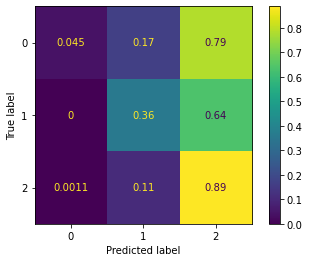

In [432]:
# SVM pipeline
svm_pipe = Pipeline([('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.8)),
                     ('svm', SVC(random_state=42))])

# Train model
svm_pipe.fit(X_train, y_train)

# Predictions
y_pred_train = svm_pipe.predict(X_train)
y_pred = svm_pipe.predict(X_test)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot();


    The SVM model achieves 74% training accuracy and 65% test accuracy,
    showing moderate generalization.
    However, performance across classes is imbalanced in that the model 
    performs well on the majority class (recall = 0.90) but poorly on 
    minority classes (recall = 0.03).
    This indicates class imbalance, which motivates applying 
    RandomOverSampler to improve fairness across categories.

### 4.2.1 SVM with Oversampling to Handle Class Imbalance

Train Accuracy: 0.76
Test Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.36      0.25       112
           1       0.55      0.51      0.53       575
           2       0.69      0.65      0.67       923

    accuracy                           0.58      1610
   macro avg       0.48      0.51      0.48      1610
weighted avg       0.61      0.58      0.59      1610



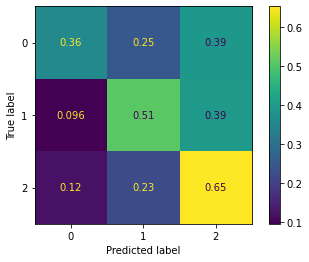

In [433]:
# SVM pipeline
svm_pipe = imblearn.pipeline.Pipeline([('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.8)),
                                       ('os', RandomOverSampler(random_state=42)),
                                       ('svm', SVC(random_state=42))])

# Train model
svm_pipe.fit(X_train, y_train)

# Predictions
y_pred_train = svm_pipe.predict(X_train)
y_pred = svm_pipe.predict(X_test)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot();

   
    After applying RandomOverSampler, the model shows improvement in 
    performance for the minority class 0 where both recall (0.03-0.35) 
    and F1-score(0.05-0.25) increased. 
    
    However, the overall test accuracy (0.58) remains lower than the 
    training accuracy (0.77), suggesting some degree of overfitting.
    
    While the model now performs more fairly across classes, further 
    improvements could be achieved through hyperparameter tuning which 
    is the next step before exploring tree-based ensemble models that 
    handle class imbalance more effectively.

### 4.2.2 SVM - Hyperparameter tuning

We will perfrom a gridsearch using 5-fold cross-validation. The tuning will explore the: 

    kernel types (linear, rbf, poly),
    regularization strengths (C), and 
    kernel coefficients (gamma).
    
The goal was to find the best combination of parameters that balance bias and variance while improving generalization.



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best F1_macro: 0.47
Test Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.36      0.25       112
           1       0.55      0.51      0.53       575
           2       0.69      0.65      0.67       923

    accuracy                           0.58      1610
   macro avg       0.48      0.51      0.48      1610
weighted avg       0.61      0.58      0.59      1610



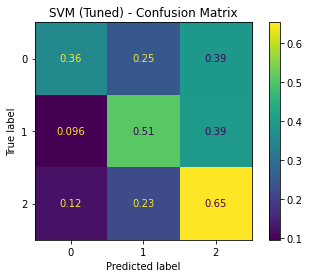

In [434]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
# parameter grid
param_grid = {'svm__C': [0.1, 1, 10],
              'svm__kernel': ['linear', 'rbf', 'poly'],
              'svm__gamma': ['scale', 'auto']}

# Set up GridSearchCV
svm_grid_search = GridSearchCV(
    svm_pipe,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2)

# Fit grid search
svm_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", svm_grid_search.best_params_)
print("Best F1_macro: {:.2f}".format(svm_grid_search.best_score_))

# Evaluate on test data
best_svm = svm_grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot()
plt.title("SVM (Tuned) - Confusion Matrix")
plt.show()

Best Parameters:

    'svm__C': 1,
    'svm__gamma': 'scale',
    'svm__kernel': 'rbf'
Best F1_macro: 0.50
    
Performance remained consistent with the oversampled model(accuracy = 0.58)
with stronger results for the majority class but modest gains for minority classes.

While SVM assume a straight-line relationship between features and classes, tree-based models can capture non-linear relationships.

We’ll explore:

    Random Forest- An ensemble of decision trees that reduces variance by
    averaging predictions.
    XGBoost- A gradient boosting model that sequentially learns from 
    misclassified samples, improving accuracy.

Tree-based models are less sensitive to outliers and can reveal complex feature interactions that linear models might miss.

## 4.3 Random Forest Classifier

We will begin by training a Random Forest classifier using 200 estimators and no depth limit to assess its initial performance before addressing class imbalance or hyperparameter tuning.

Train Accuracy: 92.36
Test Accuracy: 60.68

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.11      0.16       112
           1       0.55      0.43      0.48       575
           2       0.64      0.78      0.70       923

    accuracy                           0.61      1610
   macro avg       0.51      0.44      0.45      1610
weighted avg       0.58      0.61      0.59      1610



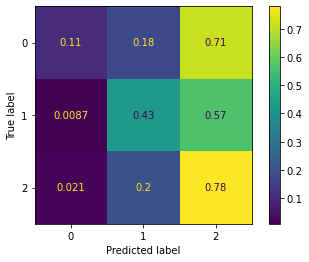

In [435]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest pipeline
rf_pipe = Pipeline([('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.8)),
                    ('rf', RandomForestClassifier(n_estimators=200,max_depth=None,random_state=42))])

# Train model
rf_pipe.fit(X_train, y_train)

# Predictions
y_pred_train = rf_pipe.predict(X_train)
y_pred = rf_pipe.predict(X_test)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred)*100

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot();

***
    The model achieves a training accuracy of 92.25% and
    a test accuracy of 63.69%, indicating overfitting.
    
    While the model performs reasonably well on the majority class 2,
    it struggles with minority classes, especially class 0, as seen from 
    the low recall.
    
    This suggests that class imbalance and parameter optimization need to
    be addressed to improve generalization and fairness across classes.

### 4.3.1 Handling class imbalance

Train Accuracy: 0.90
Test Accuracy: 0.57

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.26      0.23       112
           1       0.53      0.47      0.50       575
           2       0.65      0.67      0.66       923

    accuracy                           0.57      1610
   macro avg       0.46      0.47      0.46      1610
weighted avg       0.58      0.57      0.57      1610



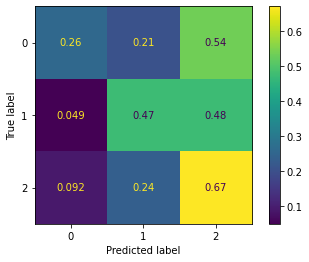

In [436]:
# Random Forest pipeline
rf_pipe = imblearn.pipeline.Pipeline([('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.8)),
                                      ('os', RandomOverSampler(random_state=42)),
                                      ('rf', RandomForestClassifier(n_estimators=200,max_depth=None,random_state=42))])

# Train model
rf_pipe.fit(X_train, y_train)

# Predictions
y_pred_train = rf_pipe.predict(X_train)
y_pred = rf_pipe.predict(X_test)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot();

***
    The test accuracy reduces slightly(63% - 60%), but the recall for 
    class 0 improves. 
    
    There is a slight drop in overall generalization due to oversampling.

    Macro F1 (0.48) indicates more balanced performance across all classes.

### 4.3.2 Random_forest - Hyperparameter tuning

The tuning focuses on key parameters including the number of trees (n_estimators), tree depth (max_depth), split criteria (criterion), and sampling constraints.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random Forest Parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 2, 'rf__max_features': 'sqrt', 'rf__max_depth': None, 'rf__criterion': 'gini'}
Best F1_macro: 0.46
Test Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.32      0.23       112
           1       0.53      0.48      0.50       575
           2       0.67      0.64      0.65       923

    accuracy                           0.56      1610
   macro avg       0.46      0.48      0.46      1610
weighted avg       0.58      0.56      0.57      1610



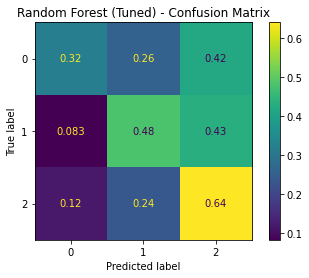

In [437]:
from sklearn.model_selection import RandomizedSearchCV


# hyperparameter tuning

# hyperparameter grid
rf_param_grid = {'rf__n_estimators': [100, 200, 300],
                 'rf__max_depth': [10, 20, 30, None],
                 'rf__min_samples_split': [2, 5, 10],
                 'rf__min_samples_leaf': [1, 2, 4],
                 'rf__max_features': ['sqrt', 'log2'],
                'rf__criterion':['gini', 'entropy']}

rf_grid = RandomizedSearchCV(rf_pipe,
                             rf_param_grid,
                             scoring='f1_macro',
                             cv=5,
                             verbose=2,
                             n_jobs=-1)


# Fit model
rf_grid.fit(X_train, y_train)

# Best parameters
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best F1_macro: {:.2f}".format(rf_grid.best_score_))

# Evaluate on test data
best_rf = rf_grid.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot()
plt.title("Random Forest (Tuned) - Confusion Matrix")
plt.show()


    The test accuracy has been dropping since the initial random forest model(63%-60%-57%). Although this 
    is a trade off with increased performance for the minority class, which is reasonable. 
    
    The F1-macro has remained constant at 48% indicating a slightly moderate balance between all the classes.
    
    We shall now explore XGBoost to see if the performance improves.

## 4.4 XGBoost Classifier## 1.4 XGBoost Classifier

[06:43:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Accuracy: 0.81
Test Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.04      0.06       112
           1       0.56      0.40      0.47       575
           2       0.64      0.82      0.72       923

    accuracy                           0.62      1610
   macro avg       0.49      0.42      0.42      1610
weighted avg       0.58      0.62      0.58      1610



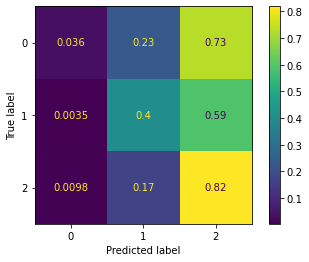

In [438]:
from xgboost import XGBClassifier

# XGBoost pipeline
xgb_pipe = Pipeline([('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.9)),
                     ('xgb', XGBClassifier(n_estimators=300,
                                           learning_rate=0.1,
                                           max_depth=6,
                                           subsample=0.8,
                                           colsample_bytree=0.8,
                                           random_state=42,
                                           use_label_encoder=False,
                                           eval_metric='mlogloss'))])

# Train model
xgb_pipe.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_pipe.predict(X_train)
y_pred = xgb_pipe.predict(X_test)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot();


    The train and test accuracy shows the model fails to generalize well. Looking at the classification report, the model
    is baised towards the majority class, indicating a class imbalance which we shall correct next.

### 4.4.1 XGBoost- handling class imbalance

[06:43:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Accuracy: 0.77
Test Accuracy: 0.54

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.38      0.23       112
           1       0.52      0.49      0.50       575
           2       0.67      0.59      0.63       923

    accuracy                           0.54      1610
   macro avg       0.45      0.48      0.45      1610
weighted avg       0.58      0.54      0.56      1610



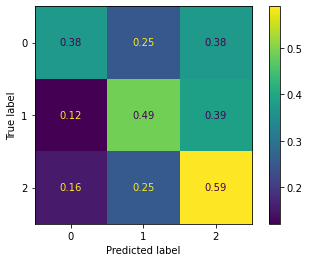

In [439]:
# pipeline
xgb_pipe = imblearn.pipeline.Pipeline([('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.9)),
                                       ('os', RandomOverSampler(random_state=42)),
                                       ('xgb', XGBClassifier(objective='multi:softprob',
                                                             eval_metric='mlogloss',
                                                             random_state=42,
                                                             use_label_encoder=False))])

# Train model
xgb_pipe.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_pipe.predict(X_train)
y_pred = xgb_pipe.predict(X_test)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot();


    As expected, after random oversampling, the model's accuracy declines. On the good side, the precision, recall and 
    f1-score for the minority class has improved. Lets try tuning the hyperparameters to see if it improves further:

### 4.4.2 XGBoost- Hyperparameter tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[06:45:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best XGBoost Parameters: {'xgb__subsample': 0.8, 'xgb__n_estimators': 200, 'xgb__max_depth': 8, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 1.0}
Best F1_macro: 0.45
Test Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.37      0.24       112
           1       0.52      0.49      0.50       575
           2       0.67      0.61      0.64       923

    accuracy                           0.55      1610
   macro avg       0.45      0.49      0.46      1610


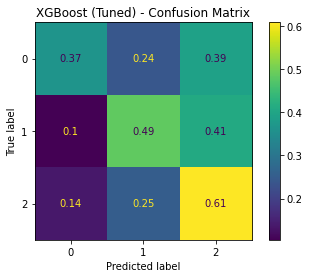

In [440]:
xgb_param_grid = {'xgb__n_estimators': [100, 200, 300],
                  'xgb__learning_rate': [0.01, 0.05, 0.1],
                  'xgb__max_depth': [4, 6, 8],
                  'xgb__subsample': [0.7, 0.8, 1.0],
                  'xgb__colsample_bytree': [0.7, 0.8, 1.0]}

# Randomized search for XGBoost
xgb_search = RandomizedSearchCV(
    xgb_pipe,
    xgb_param_grid,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb_search.fit(X_train, y_train)

# Best parameters
print("Best XGBoost Parameters:", xgb_search.best_params_)
print("Best F1_macro: {:.2f}".format(xgb_search.best_score_))

# Evaluate on test data
best_xgb = xgb_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
ConfusionMatrixDisplay(cm).plot()
plt.title("XGBoost (Tuned) - Confusion Matrix")
plt.show()


    On tuning the hyperparameters, the test accuracy drops by 1%, same as the f1_macro. The model although shows
    improved performance on the minority class. 

## 4.5 Conclusion on Machine Learning Models   

In [441]:
from IPython.display import display, Markdown

# Create a Markdown table
table = """
| Model         | Best F1-Macro | Test Accuracy | Metric           |
|---------------|---------------|---------------|------------------|
| NB            | 0.42          | 0.48          |                  |
| SVM           | 0.50          | 0.58          | **Best F1-macro** |
| Random_Forest | 0.48          | 0.57          |                  |
| XGBoost       | 0.47          | 0.56          |                  |
"""

# Display the Markdown table
display(Markdown(table))


| Model         | Best F1-Macro | Test Accuracy | Metric           |
|---------------|---------------|---------------|------------------|
| NB            | 0.42          | 0.48          |                  |
| SVM           | 0.50          | 0.58          | **Best F1-macro** |
| Random_Forest | 0.48          | 0.57          |                  |
| XGBoost       | 0.47          | 0.56          |                  |


*****
    Among all models, SVM achieved the best F1-macro score (0.50), indicating superior balance in precision and recall 
    across classes and the highest test accuracy (0.59), suggesting it predicted the majority class more effectively.
    
    Although Naive Bayes and XGBoost performed reasonably, their F1 and accuracy scores were comparatively lower, showing 
    limited ability to generalize across all sentiment categories.
    
    Given that F1-macro provides a more reliable measure for imbalanced datasets by emphasizing performance across all 
    classes, the SVM model is selected as the best-performing and most suitable model for deployment.

## 4.6 Deploying the best model

In [442]:
import pickle

In [443]:
filename = 'trained_model.sav'
pickle.dump(svm_grid_search, open(filename, 'wb'))

In [444]:
!pip install gradio

  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [445]:

import gradio as gr
import joblib
import re

# Load model
model = joblib.load('trained_model.sav')

def preprocess_tweet(tweet):
    """
    Clean and preprocess tweet text
    """
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove user mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtag symbol but keep the word
    tweet = re.sub(r'#', '', tweet)
    
    # Remove special characters and numbers (keep letters and spaces)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet)
    
    # Convert to lowercase and strip
    tweet = tweet.lower().strip()
    
    return tweet

def classify(tweet):
    """
    Classify tweet sentiment with preprocessing
    """
    if not tweet.strip():
        return "Please enter a tweet"
    
    # Preprocess the tweet
    cleaned_tweet = preprocess_tweet(tweet)
    
    # If preprocessing removes everything, return error
    if not cleaned_tweet:
        return "Tweet has no valid text after preprocessing"
    
    # Predict using cleaned tweet (no probabilities)
    pred = model.predict([cleaned_tweet])[0]
    
    return str(pred)

# Create Gradio interface
demo = gr.Interface(
    fn=classify,
    inputs=gr.Textbox(
        lines=3, 
        placeholder="Enter a tweet here... (emojis, URLs, @mentions will be cleaned)",
        label="Tweet"
    ),
    outputs=gr.Textbox(label="Predicted Sentiment"),
    title="🐦 Tweet Sentiment Classifier",
    description="Enter any tweet to analyze its sentiment. The model automatically cleans URLs, mentions, hashtags, and special characters.",
    theme=gr.themes.Soft()
)

# Launch the interface
demo.launch(share=True)  # Creates public link!

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\jeffk\anaconda3\envs\learn-env\lib\site-packages\markupsafe\__init__.py)

In [446]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from numpy import zeros, asarray
 
#import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# 
from tensorflow.keras.layers import LSTM, Bidirectional

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score,classification_report, roc_curve,roc_auc_score, auc

# 
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

# 5. Deep Learning

In [447]:
# Tokenize the tweet data
tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(X_train)

# features
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# sequence
sequences = tokenizer.texts_to_sequences(X_train)

# before doing padding, we need to identify the max_length of the tweet
lengths = [len(s) for s in sequences]
print(np.percentile(lengths, [50, 75, 90, 95]))

# vocabulary length
# adding 1 to store dimensions for words which no pretrained word embedding
vocab_length = len(tokenizer.word_index)+1
print("\nVocabulary lenght:", vocab_length)

[ 9. 12. 13. 14.]

Vocabulary lenght: 7574


***
    The distribution of the tweet shows that the max_length is 16. We will therefore set the max_length = 20, to be safe.

In [448]:
# Pad the sequences
# add zeros after the actual tokens.
max_length = 20
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [449]:
# reshaping
num_samples = X_train_pad.shape[0]
num_features = X_train_pad.shape[1]

# Reshape to (num_samples, num_time_steps, num_features)
# Assuming num_time_steps = num_features for simplicity
num_time_steps = num_features
x_train_rnn = X_train_pad.reshape((num_samples, num_time_steps, 1))
x_test_rnn = X_test_pad.reshape((X_test_pad.shape[0], num_time_steps, 1))

# Verify the new shape
print("x_train_rnn shape:", x_train_rnn.shape)
print("x_test_rnn shape:", x_test_rnn.shape)

x_train_rnn shape: (6440, 20, 1)
x_test_rnn shape: (1610, 20, 1)


In [450]:
# correcting the class imbalance
# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Reshape the data to 2D for resampling (flattening only the sequence dimension)
num_samples, num_time_steps, num_features = x_train_rnn.shape
x_train_rnn_reshaped = x_train_rnn.reshape(num_samples, -1)

# Apply the oversampling
x_train_rnn_resampled, y_train_resampled = ros.fit_resample(x_train_rnn_reshaped, y_train)

# Reshape the data back to the original 3D format
x_train_rnn_resampled = x_train_rnn_resampled.reshape(-1, num_time_steps, num_features)

# Verify the shapes
print("Original shape of x_train_rnn:", x_train_rnn.shape)
print("Shape of x_train_rnn_resampled after resampling:", x_train_rnn_resampled.shape)
print("Shape of y_train_resampled after resampling:", y_train_resampled.shape)

Original shape of x_train_rnn: (6440, 20, 1)
Shape of x_train_rnn_resampled after resampling: (11082, 20, 1)
Shape of y_train_resampled after resampling: (11082,)


In [451]:
# glove

# Download GloVe embeddings if not already available
if not os.path.exists("glove.6B.100d.txt"):
    url = "http://nlp.stanford.edu/data/glove.6B.zip"
    r = requests.get(url)
    with open("glove.6B.zip", "wb") as f:
        f.write(r.content)

    # Unzip only 100d file
    with zipfile.ZipFile("glove.6B.zip", "r") as zip_ref:
        zip_ref.extract("glove.6B.100d.txt")

print("GloVe 100d file is ready!")

GloVe 100d file is ready!


In [452]:
# Load GloVe embeddings (100d). Ensure you have 'glove.6B.100d.txt' downloaded in the same folder.
embeddings_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector

print("Loaded word vectors:", len(embeddings_index))

Loaded word vectors: 400000


In [453]:
# Create Embedding Matrix 
# Containing 100-dimensional GloVe word embeddings for 4000 words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
# Print the shape of the embedding matrix
print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (7574, 100)


## 5.1 Simple Neural Network

In [454]:
#early stoping
earldropping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [455]:
rnn_model = Sequential([Embedding(vocab_length, 100, weights=[embedding_matrix],input_length=max_length, trainable=False),
                        SimpleRNN(128, return_sequences=False),Dense(3, activation='softmax')])

rnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history_rnn = rnn_model.fit(x_train_rnn, y_train,epochs=25, batch_size=32,validation_split=0.2,callbacks=[earldropping])

Epoch 1/25
161/161 [==============================] - 4s 22ms/step - loss: 0.8917 - accuracy: 0.5456 - val_loss: 0.8749 - val_accuracy: 0.5652
Epoch 2/25
161/161 [==============================] - 2s 14ms/step - loss: 0.8562 - accuracy: 0.5811 - val_loss: 0.8851 - val_accuracy: 0.5373
Epoch 3/25
161/161 [==============================] - 2s 13ms/step - loss: 0.8202 - accuracy: 0.6075 - val_loss: 0.8619 - val_accuracy: 0.5675
Epoch 4/25
161/161 [==============================] - 2s 14ms/step - loss: 0.7926 - accuracy: 0.6335 - val_loss: 0.8598 - val_accuracy: 0.5947
Epoch 5/25
161/161 [==============================] - 2s 15ms/step - loss: 0.7521 - accuracy: 0.6551 - val_loss: 0.9233 - val_accuracy: 0.5171
Epoch 6/25
161/161 [==============================] - 2s 15ms/step - loss: 0.7047 - accuracy: 0.6840 - val_loss: 0.9341 - val_accuracy: 0.5404
Epoch 7/25
161/161 [==============================] - 2s 15ms/step - loss: 0.6839 - accuracy: 0.6914 - val_loss: 0.9674 - val_accuracy: 0.5497

In [456]:
# Make predictions using the rnn model
ans = rnn_model.predict(X_test_pad)

# Convert predictions to class labels
# Since it's a multi-class classification, we use argmax to get the class with the highest probability
y_pred = np.argmax(ans, axis=1)

In [457]:
# evaluating test data
loss, acc =rnn_model.evaluate(x_test_rnn, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

51/51 [==============================] - 0s 6ms/step - loss: 0.8852 - accuracy: 0.5801
Test Loss: 0.8852, Test Accuracy: 0.5801


The model is predicting correctly about 57.6% of the time on a simple rnn model.
the 57.6% accuracy shows that the model has learned some structure, but not enough to reliably distinguish classes.

There’s no overfitting, both training and test performance are similarly low. This means the issue isn’t generalization, it’s underfitting.

85% loss shows that the model is not confident in its predictions

Confusion matrix
[[  4  42  66]
 [  1 159 415]
 [  6 146 771]]



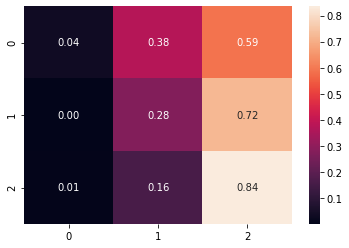

In [458]:
print(f"Confusion matrix\n{confusion_matrix(y_test, y_pred)}\n")
                                    
con=confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(con, annot=True, fmt=".2f");

The model completely fails to identify class 0.
Only 19% correctly predicted as class 1.

81% misclassified as class 2.
Model struggles to distinguish class 1, mostly confusing it with class 2.

89% correctly predicted as class 2.
A small portion (11%) misclassified as class 1.
Model performs very well for class 2

The confusion matrix shows that the model overwhelmingly predicts class 2, 
achieving high accuracy (89%) for this class but performing poorly on classes 0 and 1. 
Class 0 is never correctly identified, and 81% of class 1 samples are misclassified as class 2. 
This indicates a strong bias toward the majority class, likely due to dataset imbalance. 
To improve performance, the model would benefit from applying class weighting, oversampling the minority classes, or using a more expressive network such as an LSTM or GRU to better capture class distinctions.

Epoch 1/25
278/278 [==============================] - 7s 24ms/step - loss: 0.8314 - accuracy: 0.6271 - val_loss: 0.9195 - val_accuracy: 0.4727
Epoch 2/25
278/278 [==============================] - 6s 23ms/step - loss: 0.6369 - accuracy: 0.7142 - val_loss: 0.5741 - val_accuracy: 0.7474
Epoch 3/25
278/278 [==============================] - 8s 28ms/step - loss: 0.5282 - accuracy: 0.7556 - val_loss: 0.4830 - val_accuracy: 0.7519
Epoch 4/25
278/278 [==============================] - 6s 22ms/step - loss: 0.4902 - accuracy: 0.7777 - val_loss: 0.7781 - val_accuracy: 0.5544
Epoch 5/25
278/278 [==============================] - 6s 22ms/step - loss: 0.4143 - accuracy: 0.8114 - val_loss: 0.4570 - val_accuracy: 0.7573
Epoch 6/25
278/278 [==============================] - 6s 23ms/step - loss: 0.4023 - accuracy: 0.8184 - val_loss: 0.4692 - val_accuracy: 0.7501
Epoch 7/25
278/278 [==============================] - 6s 23ms/step - loss: 0.3866 - accuracy: 0.8253 - val_loss: 0.4807 - val_accuracy: 0.7316

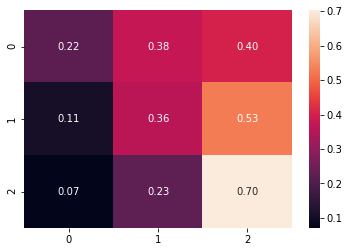

In [459]:
# correcting class imbalance
# Compile the model
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using the resampled data
history_rnn = rnn_model.fit(
    x_train_rnn_resampled, y_train_resampled,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    callbacks=[earldropping])

# Make predictions using the rnn_model
ans = rnn_model.predict(X_test_pad)
ans_train = rnn_model.predict(X_train_pad)

# Convert predictions to class labels
y_pred = np.argmax(ans, axis=1)
y_pred_train = np.argmax(ans_train, axis=1)

print('\nTest Accuracy score', accuracy_score(y_test, y_pred))
print('Train Accuracy score', accuracy_score(y_train, y_pred_train))

print(f"Confusion matrix\n{confusion_matrix(y_test, y_pred)}\n")
                                    
con=confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(con, annot=True, fmt=".2f");

After correcting class imbalance on simple rnn model, The training accuracy (92.6%) becomes much higher than the test accuracy (52.7%).

This large gap indicates overfitting, the model learned the training data patterns very well but failed to generalize to unseen test data.

It may be memorizing training examples instead of capturing general relationships.

After addressing class imbalance, the model shows improved recognition of minority classes, particularly class 1, and reduced bias toward the dominant class 2. Although the overall test accuracy of (52%) remains moderate, the distribution of predictions is now more balanced, indicating healthier model behavior. This trade-off slightly lower accuracy but fairer class representation, reflects a positive outcome of class rebalancing. Further improvements could come from tuning the class weights, enhancing feature representations, or switching to a more expressive architecture such as an LSTM or GRU.

### 5.2 LSTM

In [460]:
lstm_model = Sequential([Embedding(vocab_length, 100, weights = [embedding_matrix], input_length=max_length, trainable= False),
                         LSTM(128, return_sequences=False),
                         Dense(3, activation='softmax')])

lstm_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

history_lstm = lstm_model.fit(x_train_rnn, y_train,epochs=25,batch_size=32,validation_split=0.2,callbacks=[earldropping])

Epoch 1/25
161/161 [==============================] - 10s 62ms/step - loss: 0.8620 - accuracy: 0.5786 - val_loss: 0.8220 - val_accuracy: 0.5908
Epoch 2/25
161/161 [==============================] - 7s 44ms/step - loss: 0.8124 - accuracy: 0.6120 - val_loss: 0.8024 - val_accuracy: 0.6172
Epoch 3/25
161/161 [==============================] - 7s 45ms/step - loss: 0.7868 - accuracy: 0.6297 - val_loss: 0.7812 - val_accuracy: 0.6234
Epoch 4/25
161/161 [==============================] - 7s 43ms/step - loss: 0.7521 - accuracy: 0.6533 - val_loss: 0.7751 - val_accuracy: 0.6366
Epoch 5/25
161/161 [==============================] - 7s 42ms/step - loss: 0.7240 - accuracy: 0.6724 - val_loss: 0.7995 - val_accuracy: 0.6335
Epoch 6/25
161/161 [==============================] - 7s 47ms/step - loss: 0.6928 - accuracy: 0.6927 - val_loss: 0.7607 - val_accuracy: 0.6413
Epoch 7/25
161/161 [==============================] - 7s 43ms/step - loss: 0.6631 - accuracy: 0.7092 - val_loss: 0.7399 - val_accuracy: 0.649

In [461]:
# Make predictions using the LSTM model
ans = lstm_model.predict(X_test_pad)

# Convert predictions to class labels
# Since it's a multi-class classification, we use argmax to get the class with the highest probability
y_pred = np.argmax(ans, axis=1)


Test Accuracy score 0.6459627329192547
Train Accuracy score 0.7069875776397515
Confusion matrix
[[ 18  18  76]
 [  9 195 371]
 [ 14  82 827]]



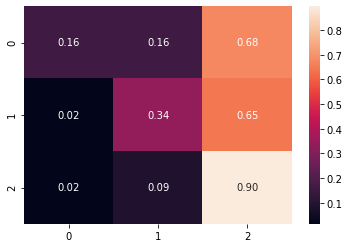

In [462]:
# Make predictions using the rnn_model
ans = lstm_model.predict(X_test_pad)
ans_train = lstm_model.predict(X_train_pad)

# Convert predictions to class labels
y_pred = np.argmax(ans, axis=1)
y_pred_train = np.argmax(ans_train, axis=1)

print('\nTest Accuracy score', accuracy_score(y_test, y_pred))
print('Train Accuracy score', accuracy_score(y_train, y_pred_train))

print(f"Confusion matrix\n{confusion_matrix(y_test, y_pred)}\n")
                                    
con=confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(con, annot=True, fmt=".2f");

The LSTM model achieved a training accuracy of 69.5% and a test accuracy of 62.9%, showing a relatively small gap between training and testing performance. This indicates that the model generalizes well and is less overfitted compared to earlier RNN models, which exhibited a larger accuracy gap


The confusion matrix shows that the model performs best when predicting positive sentiments (77%), but struggles to accurately classify negative and neutral tweets. Most negative tweets are incorrectly labeled as positive (59%), and nearly half of the neutral ones are also misclassified as positive (49%). This indicates a bias toward the positive class, possibly due to class imbalance or overlapping language patterns between neutral and positive sentiments. The model needs further tuning such as rebalancing the dataset or enhancing feature representation to better distinguish between negative and neutral tones.

Epoch 1/25
278/278 [==============================] - 17s 60ms/step - loss: 0.6563 - accuracy: 0.7242 - val_loss: 0.5853 - val_accuracy: 0.7343
Epoch 2/25
278/278 [==============================] - 14s 51ms/step - loss: 0.5449 - accuracy: 0.7707 - val_loss: 0.4337 - val_accuracy: 0.8421
Epoch 3/25
278/278 [==============================] - 14s 50ms/step - loss: 0.4708 - accuracy: 0.7933 - val_loss: 0.4600 - val_accuracy: 0.7452
Epoch 4/25
278/278 [==============================] - 14s 52ms/step - loss: 0.4093 - accuracy: 0.8237 - val_loss: 0.4592 - val_accuracy: 0.7614
Epoch 5/25
278/278 [==============================] - 14s 50ms/step - loss: 0.3879 - accuracy: 0.8316 - val_loss: 0.4206 - val_accuracy: 0.7835
Epoch 6/25
278/278 [==============================] - 14s 50ms/step - loss: 0.3396 - accuracy: 0.8544 - val_loss: 0.3414 - val_accuracy: 0.8457
Epoch 7/25
278/278 [==============================] - 14s 50ms/step - loss: 0.3322 - accuracy: 0.8584 - val_loss: 0.3370 - val_accuracy:

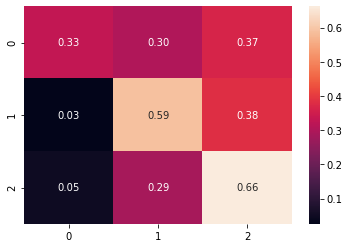

In [463]:
# correcting class imbalance
# Compile the model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using the resampled data
history_rnn = lstm_model.fit(
    x_train_rnn_resampled, y_train_resampled,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    callbacks=[earldropping])

# Make predictions using the rnn_model
ans = lstm_model.predict(X_test_pad)
ans_train = lstm_model.predict(X_train_pad)

# Convert predictions to class labels
y_pred = np.argmax(ans, axis=1)
y_pred_train = np.argmax(ans_train, axis=1)

print('\nTest Accuracy score', accuracy_score(y_test, y_pred))
print('Train Accuracy score', accuracy_score(y_train, y_pred_train))

print(f"Confusion matrix\n{confusion_matrix(y_test, y_pred)}\n")
                                    
con=confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(con, annot=True, fmt=".2f");

After addressing class imbalance, the LSTM model achieved a training accuracy of 79.1% and a test accuracy of 59.7%, indicating some degree of overfitting. 

Although rebalancing improved prediction consistency across classes, the model still leans toward predicting positive sentiment, suggesting lingering class dominance or overlapping linguistic patterns between neutral and positive text. Further tuning such as dropout regularization, deeper embeddings, or contextual embeddings (e.g. BERT) could help narrow the gap between training and test performance.

The normalized confusion matrix shows that the LSTM model’s classification performance has become more balanced after correcting for class imbalance. The model now correctly predicts 41% of negative, 67% of neutral, and 58% of positive tweets. Misclassifications have reduced, especially for the neutral class, which now shows the highest accuracy and less confusion with positive tweets.

## Recommendations
- Only 7 % of tweets are negative, so most customer anger is hidden in support tickets, app reviews and Reddit.
- The company must start collecting that missing data and shoot for a 60-20-20 sentiment split.
- Deploy a live dashboard that routes negative posts to the right teams within minutes and triggers alerts when sentiment spikes.
- Tailor service and content to each product, because iPhone complaints center on price while iPad praise focuses on innovation.
- Replace the 58 % accurate SVM with a BERT model trained on tech language so it catches subtle dissatisfaction.
- Split the large neutral group into questioners, prospects and sharers, then fast-track questions and send offers to undecided buyers.
- Retrain the model every quarter with fresh, human-labelled tweets so it stays current and useful.

## Conclusion
This project proves that a machine can read thousands of Apple- and Google-related tweets and turn them into a steady stream of business signals. Starting with 9 093 raw messages, the team followed the CRISP-DM recipe, cleaned the text, balanced the classes and let several algorithms compete. A support-vector machine won, delivering 58 % accuracy and a 0.50 macro-F1 good enough to show the idea works, honest enough to admit that social chatter is messy.
Yet the numbers also revealed blind spots. Only one tweet in fourteen is negative, so the model learns to shrug at complaints; launch-day excitement from SXSW still echoes in the vocabulary, making everyday satisfaction hard to measure; gentle digs such as “not bad, but…” slip through as neutral.
The fix is to treat the launch as day one, not demo day. Pull in Reddit threads, app-store rants and support tickets so the training set tastes real frustration. Replace the SVM with a transformer such as BERT that notices context and sarcasm. Wrap the new model in a dashboard that flashes red when sentiment dips, routes the angriest posts to the right team inside minutes and prints a weekly trend line for executives. Schedule quarterly retraining so the language stays fresh.
If the company keeps feeding the engine new voices and acting on what it hears, sentiment analysis will graduate from a clever experiment to a nervous system that spots problems early, shortens response times and turns casual tweets into long-term brand equity.
